# Decision trees
Decision trees are a widely used models for classification and regression tasks.
Essentially, they learn a hierarchy of “if-else” questions, leading to a decision.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
import sklearn
import mglearn

In [70]:
from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()

In [71]:
# See the data:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [72]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 22294)

In [74]:
tree = DecisionTreeClassifier(random_state = 22294)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=22294, splitter='best')

In [75]:
print("accuracy on training set: %f" % tree.score(x_train, y_train))
print("accuracy on training set: %f" % tree.score(x_test, y_test))

accuracy on training set: 1.000000
accuracy on training set: 0.902098


As expected, the accuracy on the training set is 100% as the leaves are pure.
The test-set accuracy is slightly worse than the linear models above, which had
around 95% accuracy.
Now let’s apply pre-pruning to the tree, which will stop developing the tree before we
perfectly fit to the training data.

In [76]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 22294)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=22294, splitter='best')

In [77]:
print("accuracy on training set: %f" % tree.score(x_train, y_train))
print("accuracy on test set: %f" % tree.score(x_test, y_test))

accuracy on training set: 0.985915
accuracy on test set: 0.930070


Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on
the training set, but an improvement on the test set.

## Feature Importance in trees

The feature importances always sum to one.

In [78]:
tree.feature_importances_

array([0.        , 0.00708458, 0.        , 0.0322921 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01032362, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.174899  , 0.        ,
       0.01518125, 0.01054575, 0.7496737 , 0.        , 0.        ])

(0, 1)

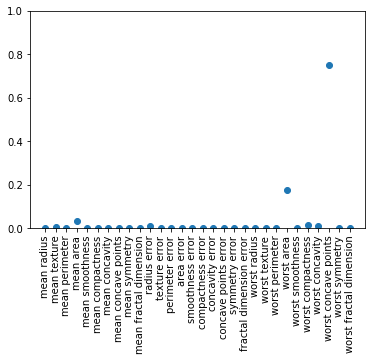

In [79]:
# Visualize:
plt.plot(tree.feature_importances_, "o")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)

plt.ylim(0,1)

Here, we see that the feature used at the top split (“worst radius”) is by far the most
important feature. This confirms our observation in analyzing the tree, that the first
level already separates the two classes fairly well.

Feature importances: [0. 1.]


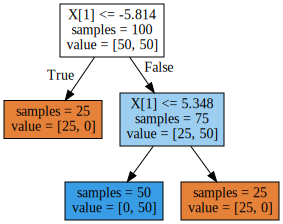

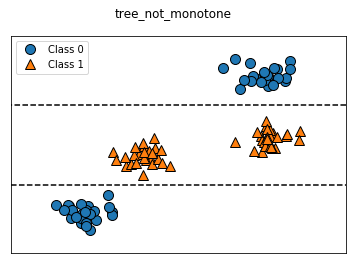

In [80]:
tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("tree_not_monotone")
tree

In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features. The main down-side of decision trees is that even with the use of pre-pruning, decision trees tend to overfit, and provide poor generalization performance.

# Ensembles of Decision Trees

There are many models in the machine learning literature that belong to this category,
but there are two ensemble models that have proven to be effective on a wide
range of datasets for classification and regression, both of which use decision trees as
their building block: **Random Forests** and **Gradient Boosted** Decision Trees.

## Random Forests

* A main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. Random forests are essentially a collection of
decision trees, where each tree is slightly different from the others.
* The idea of random forests is that each tree might do a relatively good job of predicting,
but will likely overfit on part of the data.
If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results. This reduction in overfitting,
while retaining the predictive power of the trees, can be shown using rigorous
mathematics.

### Building Random Forests

Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and looks for the best possible test involving one of these features. The
amount of features that is selected is controlled by the `max_features` parameter.

In [93]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=222)
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 222)

forest = RandomForestClassifier(n_estimators = 5, random_state = 222)
forest.fit(x_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=222, verbose=0, warm_start=False)

Let’s visualize the decision boundaries learned by each tree

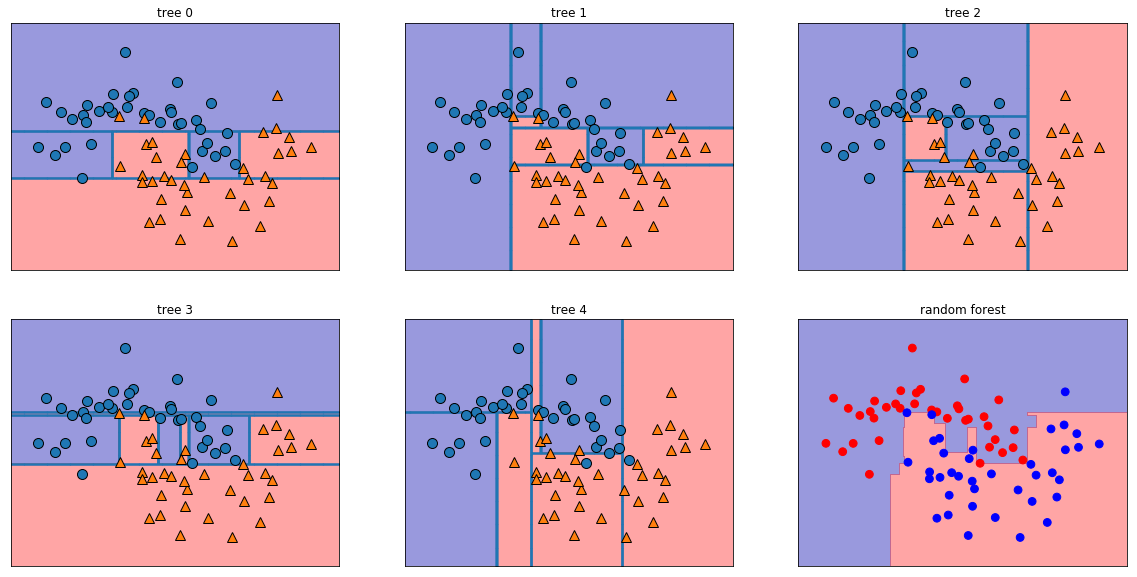

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax = ax)
mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(x_train[:, 0], x_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

*Breast cancer datasets*

In [97]:
## Before pruning

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state = 22294)

In [110]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 1,
                               random_state = 22294)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=22294, verbose=0,
            warm_start=False)

In [111]:
print("accuracy on training set: %f" % forest.score(x_train, y_train))
print("accuracy on test set: %f" % forest.score(x_test, y_test))

accuracy on training set: 0.931925
accuracy on test set: 0.930070


Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate

## Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
x_train, x_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=22294)

In [120]:
gbrt = GradientBoostingClassifier(random_state = 22294)
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=22294, subsample=1.0, verbose=0,
              warm_start=False)

In [121]:
print("accuracy on training set: %f" % gbrt.score(x_train, y_train))
print("accuracy on test set: %f" % gbrt.score(x_test, y_test))


accuracy on training set: 1.000000
accuracy on test set: 0.944056


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting,
we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [131]:
gbrt = GradientBoostingClassifier(random_state=22294,learning_rate = 0.05)
gbrt.fit(x_train, y_train)
print("accuracy on training set: %f" % gbrt.score(x_train, y_train))
print("accuracy on test set: %f" % gbrt.score(x_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.923077


In [127]:
gbrt = GradientBoostingClassifier(random_state=22294, max_depth=1)
gbrt.fit(x_train, y_train)
print("accuracy on training set: %f" % gbrt.score(x_train, y_train))
print("accuracy on test set: %f" % gbrt.score(x_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.958042


As gradient boosting and random forest perform well on similar kinds of data, a
common approach is to first try random forests, which work quite robustly. If random
forests work well, but prediction time is at a premium, or it is important to
squeeze out the last percentage of accuracy from the machine learning model, moving
to gradient boosting often helps.